In [1]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('Preprocesses_result.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,7.611178,1,44.00000,1,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,2,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,7.611178,3,46.00000,1,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,3,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,7.611178,1,41.00000,4,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,3,...,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,7.611178,5,22.00000,3,...,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,7.611178,6,37.00000,3,...,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,6,...,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0,2017,6


In [4]:
X = df.drop(columns=['RainTomorrow','Date'],axis=1) 
y = df['RainTomorrow']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
cat = CatBoostClassifier(iterations=2000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=200)
cat.fit(X_train, y_train)

0:	learn: 0.6203975	total: 104ms	remaining: 3m 27s
200:	learn: 0.3184490	total: 22.4s	remaining: 3m 20s
400:	learn: 0.2977868	total: 51.2s	remaining: 3m 23s
600:	learn: 0.2825244	total: 1m 15s	remaining: 2m 56s
800:	learn: 0.2696243	total: 1m 37s	remaining: 2m 26s
1000:	learn: 0.2586135	total: 2m	remaining: 2m
1200:	learn: 0.2483667	total: 2m 22s	remaining: 1m 35s
1400:	learn: 0.2390913	total: 2m 46s	remaining: 1m 11s
1600:	learn: 0.2304342	total: 3m 7s	remaining: 46.7s
1800:	learn: 0.2222147	total: 3m 29s	remaining: 23.1s
1999:	learn: 0.2146144	total: 3m 52s	remaining: 0us


In [7]:
y_pred_probs = cat.predict_proba(X_test)[:, 1]

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

In [9]:
roc_auc = auc(fpr, tpr)

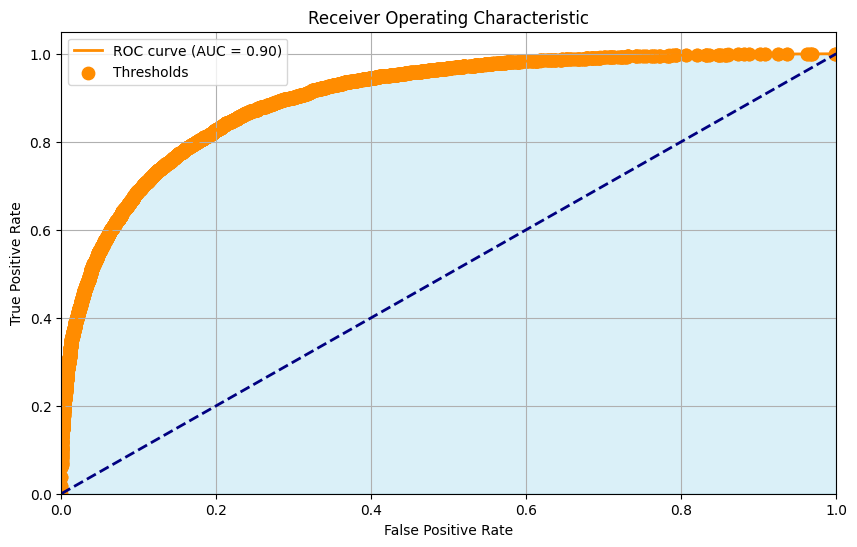

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')


plt.grid(True)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)
plt.scatter(fpr, tpr, color='darkorange', marker='o', label='Thresholds', s=80)
plt.legend()

plt.show()

In [11]:
joblib.dump(cat, "cat.pkl")

['cat.pkl']